In [28]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Подключаем необходимые библиотеки.

In [21]:
os.chdir(r'C:\Users\ммм\Desktop\CSC\Анализ данных\Lect_04\задача_1_леденцы')

Задаем рабочую папку.

In [22]:
dataset = pd.read_csv("ledency.dat", sep=";")

Импортируем наши данные.

In [23]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [26]:
print(dataset)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0     4   5   5   5   3   3   3   3   3    3    3
1     5   4   5   5   3   3   3   3   3    3    3
2     5   5   4   5   3   3   3   3   3    3    3
3     5   4   5   5   3   3   3   3   3    3    3
4     4   5   5   5   3   3   3   3   3    3    3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...
333   3   3   3   3   3   3   5   5   3    3    3
334   3   3   3   3   3   3   5   5   3    3    3
335   3   3   3   3   3   3   5   5   3    3    3
336   3   3   3   3   3   3   5   5   3    3    3
337   3   3   3   3   3   3   5   5   3    3    3

[338 rows x 11 columns]


Понимаем размерность данных, с которыми мы работаем - 338 человек ответили в опросе по 11 пунктам.

In [25]:
dataset.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Убеждаемся, что с данными все порядке: мы работаем с количественными переменными, каждый из 
338 человек ответил на все из 11 вопросов, а также замечаем, что минимум во всех столбцах - 2,
а максимум - 5, поэтому опрашиваемые ставили оценки в данном опросе от 2 до 5, 
следовательно стандартизация не нужна.

In [30]:
link = linkage(dataset, 'ward', 'euclidean')

В ходе выполнения лабораторной работы экспериментальным путем было выявлено, что лучшие результаты получились при методе вычисления расстояний между кластерами методом ward, поэтому 
возьмем метод ward в качестве рабочего.

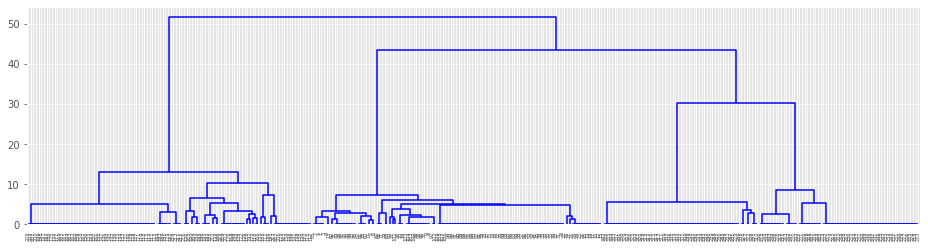

In [31]:
fig = plt.figure(figsize=(16,4))
dn = dendrogram(link, color_threshold = -1,orientation='top',labels=dataset.index.tolist())

Построим дендрограмму. Из дендрограммы не понятно, на какой высоте нужно сечь дендрограмму, 
чтобы получить число кластеров, поэтому будем смотреть на каменную осыпь с целью нахождения
числа кластеров.

In [33]:
dist = link[:, 2]

Массив dist содержит в себе расстояния между объединяемыми кластерами на каждом шаге
алгоритма иерархического кластерного анализа.

Text(0, 0.5, 'Distance')

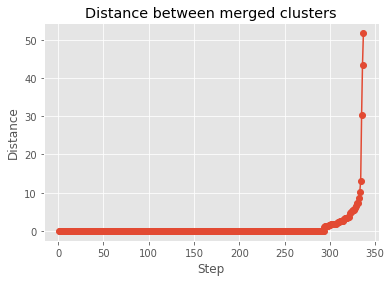

In [34]:
dist_rev = dist[:]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

Из приведенной выше каменистой осыпи понятно, что дистанция между объединяемыми кластерами 
начинается заметно увеличиваться где-то с 290 шага, а именно c 293.

In [35]:
dist[290:]

array([ 0.        ,  0.        ,  0.        ,  1.15470054,  1.34164079,
        1.35873244,  1.41421356,  1.41421356,  1.63299316,  1.63299316,
        1.69030851,  1.73205081,  1.73205081,  1.82574186,  1.82574186,
        1.93009708,  1.93649167,  1.95180015,  2.22111083,  2.30940108,
        2.5560386 ,  2.5819889 ,  2.68328157,  2.68328157,  2.76502769,
        3.09838668,  3.27326835,  3.34664011,  3.399209  ,  3.6566964 ,
        3.765339  ,  4.70224533,  5.02468483,  5.115595  ,  5.38112644,
        5.38178747,  5.4279342 ,  5.97927803,  6.55149433,  7.17827943,
        7.18679344,  8.49202664, 10.21643334, 13.03013582, 30.21829021,
       43.44161878, 51.70554708])

In [36]:
dist[292],dist[293]

(0.0, 1.1547005383792515)

Text(0, 0.5, 'Distance')

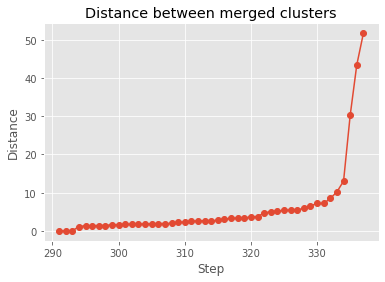

In [37]:
dist_rev = dist[290:]
idxs = range(291, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

Рассмотрим каменистую осыпь с 290 шага: опять, понятно, что до 320 шага расстояние растет 
медленно, поэтому рассмотрим каменистую осыпь начиная с 320 шага.

Text(0, 0.5, 'Distance')

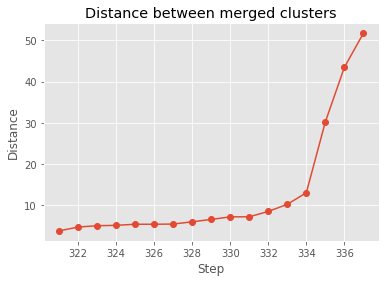

In [42]:
dist_rev = dist[320:]
idxs = range(321, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

Теперь, стало очевидным, что прекращать объединение кластеров нужно либо на 332,
либо на 333, либо на 334 шаге.

In [43]:
dist[331:]

array([ 8.49202664, 10.21643334, 13.03013582, 30.21829021, 43.44161878,
       51.70554708])

Text(323, 7, '6 кластеров')

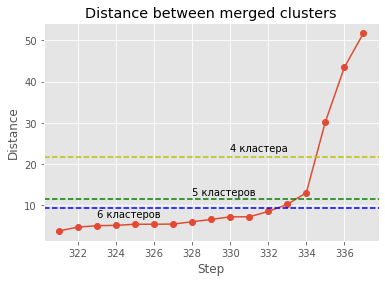

In [44]:
dist_rev = dist[320:]
idxs = range(321, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(9.35, c='b', linestyle='dashed')
plt.axhline(11.62, c='g', linestyle='dashed')
plt.axhline(21.65, c='y', linestyle='dashed')
plt.text(330, 23, '4 кластера')
plt.text(328, 12.5, '5 кластеров')
plt.text(323, 7, '6 кластеров')

Шесть кластеров.

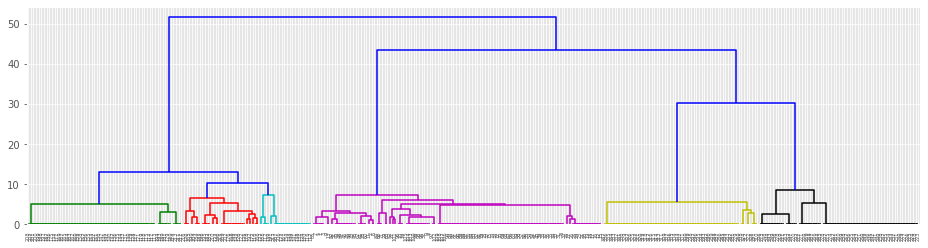

In [45]:
fig = plt.figure(figsize=(16,4))
dn = dendrogram(link, color_threshold = 9.35,orientation='top',labels=dataset.index.tolist())

Пять кластеров.

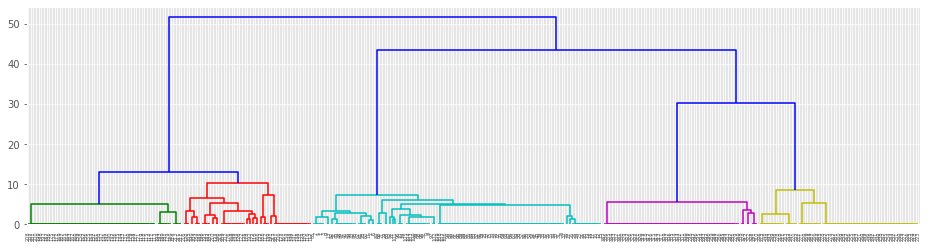

In [46]:
fig = plt.figure(figsize=(16,4))
dn = dendrogram(link, color_threshold = 11.62,orientation='top',labels=dataset.index.tolist())

Четыре кластера.

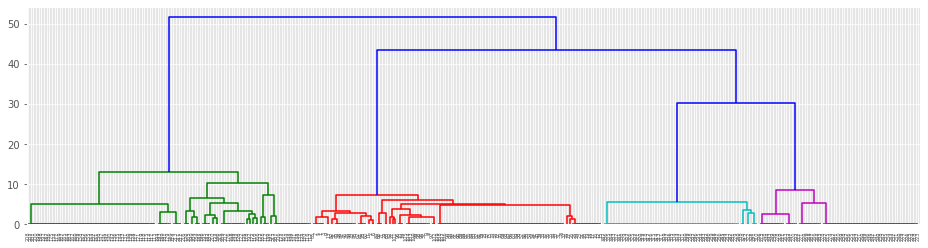

In [47]:
fig = plt.figure(figsize=(16,4))
dn = dendrogram(link, color_threshold = 21.65,orientation='top',labels=dataset.index.tolist())

Теперь поймем, какое количество кластеров наиболее предпочтительное, начнем с 4 кластеров.

In [48]:
dataset['cluster'] = fcluster(link, 21.65, criterion='distance')

В случае четырех кластеров, их размеры следующие:

In [49]:
dataset.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

In [50]:
dataset.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


Перейдем к интерпретации выделенных четырех групп потребителей:

1 группа - те кто поставили максимальные оценки по 9, 10 и 11 пунктам - это те, кто потребляет леденцы для
лечения, для улучшения состояния горла, носа и т.д.

2 группа - те, кто поставили максимальные оценки по 1, 2, 3 и 4 пунктам - это те, кто потребляет леденцы для
того, чтобы освежить полость рта, избавиться от неприятного запаха, привкуса во рту и т.д.

3 группа - те, кто поставили максимальные оценки по 7 и 8 пунктам - это те, кто потребляет леденцы для
концентрации внимания, отвлечения и т.д.



4 группа - те, кто поставили максимальные оценки по 5 и 6 пунктам - это такие "сладкоежки", которые
потребляют леденцы как источник/замена чего-то сладкого

Что будет в случае пяти кластеров?

In [51]:
dataset['cluster'] = fcluster(link, 11.62, criterion='distance')

В случае пяти кkастеров, их размеры следующие.

In [40]:
dataset.groupby('cluster').size()

cluster
1     59
2     49
3    110
4     59
5     61
dtype: int64

In [52]:
dataset.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.932203,4.830508,4.898305
2,2.612245,2.632653,2.489796,2.163265,2.142857,2.081633,2.448980,2.816327,4.979592,4.795918,4.816327
3,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
4,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
5,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


Проинтерпритируем выделенные пять групп потребителей:

1 и 2 группа - это, по сути, разговор об одном и том же - это те кто поставили максимальные оценки по 9, 10 и 11 пунктам,
то есть это те, кто потребляет леденцы для лечения, для улучшения состояния горла, носа.
Такое разделение избыточно, потому что первая и вторая группа - потребители леденцов с общей потребностью
в леденцах как средстве лечения и улучшения самочувствия.


В остальных группах все также, как и при четырех кластерах:

3 группа - те, кто поставили максимальные оценки по 1, 2, 3 и 4 пунктам - это те, кто потребляет леденцы для
того, чтобы освежить полость рта, избавиться от неприятного запаха, привкуса во рту и т.д.

4 группа - те, кто поставили максимальные оценки по 7 и 8 пунктам - это те, кто потребляет леденцы для
концентрации внимания, отвлечения и т.д.

5 группа - те, кто поставили максимальные оценки по 5 и 6 пунктам - это такие "сладкоежки", которые
потребляют леденцы как источник/замена чего-то сладкого

Что будет в случае шести кластеров?

In [ ]:
dataset['cluster'] = fcluster(link, 9.35, criterion='distance')

В случае шести кластеров, их размеры следующие.

In [ ]:
dataset.groupby('cluster').size()

In [ ]:
dataset.groupby('cluster').mean()

Проинтерпритируем выделенные шесть групп потребителей.

Ситуцаия полностью аналогична предудыщей с пятью кластерами: избыточное деление потребителей, которые
употребляют леденцы как средство лечения заложенности и улучшения самочувствия, только уже не на две подгруппы, а на три.

В остальных же группах потребитилей все как раньше:

4 группа - те, кто поставили максимальные оценки по 1, 2, 3 и 4 пунктам - это те, кто потребляет леденцы для
того, чтобы освежить полость рта, избавиться от неприятного запаха, привкуса во рту и т.д.

5 группа - те, кто поставили максимальные оценки по 7 и 8 пунктам - это те, кто потребляет леденцы для
концентрации внимания, отвлечения и т.д.

6 группа - те, кто поставили максимальные оценки по 5 и 6 пунктам - это такие "сладкоежки", которые
потребляют леденцы как источник/замена чего-то сладкого.

Таким образом, избегая избыточного деления одних и тех же потребителей на подгруппы, 
принимаем решение о том,
что количество кластеров будет равно четырем, имеем четыре группы потребителей леденцов 
со следующими размерами:

In [53]:
dataset['cluster'] = fcluster(link, 21.65, criterion='distance')
dataset.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

In [54]:
dataset.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


Номера респондентов, принадлежащих первому кластеру.

In [55]:
dataset[dataset['cluster']==1].index.values

array([110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217], dtype=int64)

Номера респондентов, принадлежащих второму кластеру.

In [56]:
dataset[dataset['cluster']==2].index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109], dtype=int64)

Номера респондентов, принадлежащих третьему кластеру.

In [57]:
dataset[dataset['cluster']==3].index.values

array([279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
       292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
       305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
       318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
       331, 332, 333, 334, 335, 336, 337], dtype=int64)

Номера респондентов, принадлежащих четвертому кластеру.

In [58]:
dataset[dataset['cluster']==4].index.values

array([218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278], dtype=int64)

Вывод. Таким образом, в ходе выполнения лабораторной работы было определено, что число кластеров, то есть число 
сегментов различных потребителей леденцов равно четырем. Первая группа потребителей - те, кто потребляет леденцы
для того, чтобы избавиться от заложенности в носу/горле. Вторая группа потребителей - те, кто потребляет леденцы
для того, чтобы получить "второе дыхаение", чувствовать себя бодрее. Третья группа потребителей - те, кто 
потребляет леденцы для увеличения концентрации и для того, чтобы сосредоточиться. Четвертая группа потребителей - 
"сладкоежки", которые потребляют леденцы как что-то сладкое/заменитель чего-то сладкого.